In [1]:
#!pip install chart_studio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import plotly.express as px
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf

cf.go_offline()
import chart_studio.plotly
chart_studio.tools.set_credentials_file(username = "rodrigo.mig.pereira", api_key = "m3flLSyWH1CBAYqcQ2K8")
chart_studio.tools.set_config_file(world_readable=True, sharing='public')
from sklearn.compose import ColumnTransformer

In [2]:
df1 = pd.read_csv("ds_salaries.csv")
df2 = pd.read_csv("jobs_in_data.csv")

df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
df2

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [4]:
df1.shape

(3755, 11)

In [5]:
df2.shape

(9355, 12)

In [6]:
df1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df2.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [8]:
#df1.drop_duplicates(inplace=True)

In [9]:
df2.drop_duplicates(inplace=True)

In [10]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [11]:
df2

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5341 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5341 non-null   int64 
 1   job_title           5341 non-null   object
 2   job_category        5341 non-null   object
 3   salary_currency     5341 non-null   object
 4   salary              5341 non-null   int64 
 5   salary_in_usd       5341 non-null   int64 
 6   employee_residence  5341 non-null   object
 7   experience_level    5341 non-null   object
 8   employment_type     5341 non-null   object
 9   work_setting        5341 non-null   object
 10  company_location    5341 non-null   object
 11  company_size        5341 non-null   object
dtypes: int64(3), object(9)
memory usage: 542.4+ KB


In [14]:
df1["remote_ratio"] = df1["remote_ratio"].astype(str)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   object
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(3), object(8)
memory usage: 322.8+ KB


In [16]:
df1.rename(columns={"remote_ratio": "work_setting"}, inplace=True)

In [17]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [18]:
replace_dict = {"100": "Remote", "50": "Hybrid", "0": "In-person"}
df1["work_setting"] = df1["work_setting"].map(replace_dict)

In [19]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,Remote,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,Remote,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,Remote,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,Remote,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,Remote,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,Remote,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,Remote,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,Remote,US,L


In [20]:
replace_dict = {"SE": "Senior", "MI": "Mid-level", "EN": "Entry-level", "EX": "Executive"}
df1["experience_level"] = df1["experience_level"].map(replace_dict)

In [21]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,L
1,2023,Mid-level,CT,ML Engineer,30000,USD,30000,US,Remote,US,S
2,2023,Mid-level,CT,ML Engineer,25500,USD,25500,US,Remote,US,S
3,2023,Senior,FT,Data Scientist,175000,USD,175000,CA,Remote,CA,M
4,2023,Senior,FT,Data Scientist,120000,USD,120000,CA,Remote,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,FT,Data Scientist,412000,USD,412000,US,Remote,US,L
3751,2021,Mid-level,FT,Principal Data Scientist,151000,USD,151000,US,Remote,US,L
3752,2020,Entry-level,FT,Data Scientist,105000,USD,105000,US,Remote,US,S
3753,2020,Entry-level,CT,Business Data Analyst,100000,USD,100000,US,Remote,US,L


In [22]:
replace_dict = {"FT": "Full-time", "CT": "Contract", "FL": "Freelance", "PT": "Part-time"}
df1["employment_type"] = df1["employment_type"].map(replace_dict)

In [23]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,L
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,US,Remote,US,S
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,US,Remote,US,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Remote,CA,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Remote,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Remote,US,L
3751,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,US,Remote,US,L
3752,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,US,Remote,US,S
3753,2020,Entry-level,Contract,Business Data Analyst,100000,USD,100000,US,Remote,US,L


In [24]:
df1.employee_residence.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [25]:
df3 = pd.read_excel("ds_salaries.xlsx", index_col=0)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 2023 to 2021
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   experience_level    3755 non-null   object
 1   employment_type     3755 non-null   object
 2   job_title           3755 non-null   object
 3   salary              3755 non-null   int64 
 4   salary_currency     3755 non-null   object
 5   salary_in_usd       3755 non-null   int64 
 6   employee_residence  3755 non-null   object
 7   remote_ratio        3755 non-null   int64 
 8   company_location    3753 non-null   object
 9   company_size        3755 non-null   object
dtypes: int64(3), object(7)
memory usage: 322.7+ KB


In [27]:
df1['employee_residence'] = df3['employee_residence'].values
df1['company_location'] = df3['company_location'].values
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,Remote,Spain,L
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,United States,Remote,United States,S
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,United States,Remote,United States,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,Canada,Remote,Canada,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,Canada,Remote,Canada,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L
3751,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L
3752,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S
3753,2020,Entry-level,Contract,Business Data Analyst,100000,USD,100000,United States,Remote,United States,L


In [28]:
df1.drop_duplicates(inplace=True)
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,Remote,Spain,L
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,United States,Remote,United States,S
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,United States,Remote,United States,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,Canada,Remote,Canada,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,Canada,Remote,Canada,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L
3751,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L
3752,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S
3753,2020,Entry-level,Contract,Business Data Analyst,100000,USD,100000,United States,Remote,United States,L


In [29]:
df2

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [30]:
df2.drop(columns=["job_category"], inplace=True)
df2

,work_year,job_title,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [31]:
frames = [df1, df2]

mini_project_dataset = pd.concat(frames)
mini_project_dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,Remote,Spain,L
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,United States,Remote,United States,S
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,United States,Remote,United States,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,Canada,Remote,Canada,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,Canada,Remote,Canada,M
...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L
9351,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L
9352,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L
9353,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S


In [32]:
mini_project_dataset.drop_duplicates(inplace=True)
mini_project_dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,Remote,Spain,L
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,United States,Remote,United States,S
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,United States,Remote,United States,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,Canada,Remote,Canada,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,Canada,Remote,Canada,M
...,...,...,...,...,...,...,...,...,...,...,...
8586,2022,Mid-level,Full-time,Applied Machine Learning Scientist,75000,USD,75000,Bolivia,Remote,United States,M
9068,2022,Mid-level,Full-time,Applied Machine Learning Scientist,75000,USD,75000,Bolivia,Remote,United States,L
9123,2021,Mid-level,Full-time,Applied Machine Learning Scientist,38400,USD,38400,Vietnam,Remote,United States,M
9276,2021,Senior,Full-time,Data Analytics Engineer,50000,USD,50000,Vietnam,Remote,United Kingdom,M


In [33]:
mini_project_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5563 entries, 0 to 9324
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5563 non-null   int64 
 1   experience_level    5563 non-null   object
 2   employment_type     5563 non-null   object
 3   job_title           5563 non-null   object
 4   salary              5563 non-null   int64 
 5   salary_currency     5563 non-null   object
 6   salary_in_usd       5563 non-null   int64 
 7   employee_residence  5563 non-null   object
 8   work_setting        5563 non-null   object
 9   company_location    5561 non-null   object
 10  company_size        5563 non-null   object
dtypes: int64(3), object(8)
memory usage: 521.5+ KB


In [34]:
mini_project_dataset.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      2
company_size          0
dtype: int64

In [35]:
mini_project_dataset.dropna(inplace=True)
mini_project_dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,Remote,Spain,L
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,United States,Remote,United States,S
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,United States,Remote,United States,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,Canada,Remote,Canada,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,Canada,Remote,Canada,M
...,...,...,...,...,...,...,...,...,...,...,...
8586,2022,Mid-level,Full-time,Applied Machine Learning Scientist,75000,USD,75000,Bolivia,Remote,United States,M
9068,2022,Mid-level,Full-time,Applied Machine Learning Scientist,75000,USD,75000,Bolivia,Remote,United States,L
9123,2021,Mid-level,Full-time,Applied Machine Learning Scientist,38400,USD,38400,Vietnam,Remote,United States,M
9276,2021,Senior,Full-time,Data Analytics Engineer,50000,USD,50000,Vietnam,Remote,United Kingdom,M


In [36]:
mini_project_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5561 entries, 0 to 9324
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5561 non-null   int64 
 1   experience_level    5561 non-null   object
 2   employment_type     5561 non-null   object
 3   job_title           5561 non-null   object
 4   salary              5561 non-null   int64 
 5   salary_currency     5561 non-null   object
 6   salary_in_usd       5561 non-null   int64 
 7   employee_residence  5561 non-null   object
 8   work_setting        5561 non-null   object
 9   company_location    5561 non-null   object
 10  company_size        5561 non-null   object
dtypes: int64(3), object(8)
memory usage: 521.3+ KB


In [37]:
mini_project_dataset.describe().astype(int)

,work_year,salary,salary_in_usd
count,5561,5561,5561
mean,2022,177953,142637
std,0,553877,68360
min,2020,6000,5132
25%,2022,94000,92280
50%,2023,140000,136620
75%,2023,187500,185000
max,2023,30400000,450000


C:\Users\torei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



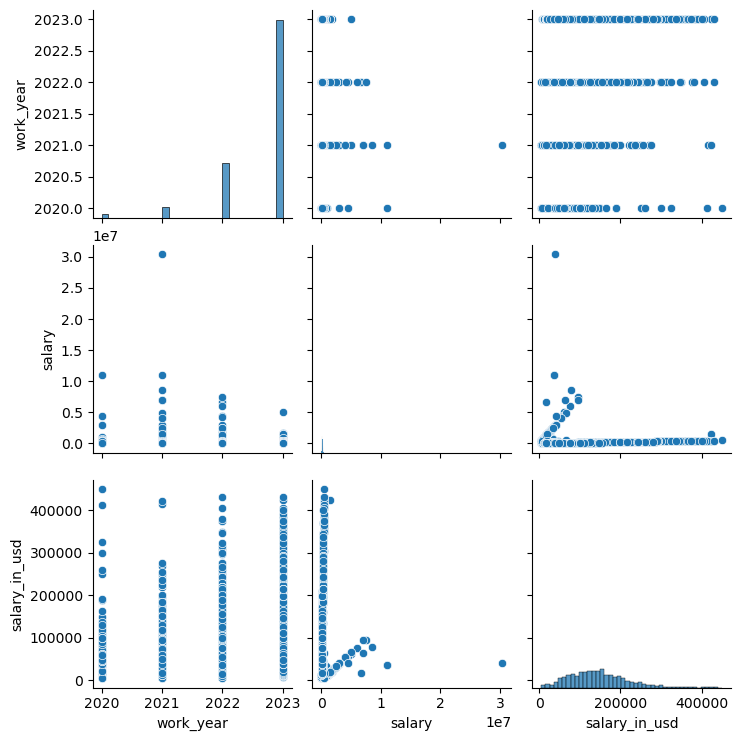

In [38]:
sns.pairplot(mini_project_dataset)

In [39]:
fig = px.violin(mini_project_dataset, x="company_size", y="salary_in_usd")
fig.show()

In [40]:
fig = px.violin(mini_project_dataset, x="work_setting", y="salary_in_usd")
fig.show()

In [75]:
location_counts = mini_project_dataset['company_location'].value_counts()
# Filter locations with more than 10 entries
locations_with_more_than_10_entries = location_counts[location_counts > 10].index
# Filter the dataset to include only locations with more than 10 entries
filtered_dataset = mini_project_dataset[mini_project_dataset['company_location'].isin(locations_with_more_than_10_entries)]
# Calculate average salaries for each company location
avg_salary_by_location = filtered_dataset.groupby('company_location')['salary_in_usd'].mean().reset_index()
# Sort the average salaries in descending order
avg_salary_by_location_sorted = avg_salary_by_location.sort_values(by='salary_in_usd', ascending=False)
# Select the top 10 locations with the highest average salaries
top_10_avg_salaries = avg_salary_by_location_sorted.head(20)
# Create histogram
fig = px.bar(top_10_avg_salaries, x='company_location', y='salary_in_usd', title='Top Average Salaries by Location')
fig.show()

In [42]:

fig = px.histogram(mini_project_dataset, x="work_year", y="salary_in_usd", color = 'experience_level')
fig.show()

In [43]:
avg_salary_by_setting_and_size = mini_project_dataset.groupby(['work_setting', 'company_size'])['salary_in_usd'].mean().reset_index()

work_setting_order = ['Hybrid', 'Remote', 'In-person']

# Plotting with Plotly Express
fig = px.bar(avg_salary_by_setting_and_size, 
             x='company_size', 
             y='salary_in_usd', 
             color='work_setting', 
             barmode='group',
             title='Average Salary by Work Setting and Company Size',
             labels={'salary_in_usd': 'Average Salary (USD)', 'company_size': 'Company Size'},
             height=500,
             category_orders={'work_setting': work_setting_order}
            )

fig.update_layout(legend_title='Work Setting')

fig.show()

In [44]:
avg_salary_by_level_and_size = mini_project_dataset.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean().reset_index()

experience_level_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']
# Plotting with Plotly Express
fig = px.bar(avg_salary_by_level_and_size, 
             x='company_size', 
             y='salary_in_usd', 
             color='experience_level', 
             barmode='group',
             title='Average Salary by Experience Level and Company Size',
             labels={'salary_in_usd': 'Average Salary (USD)', 'company_size': 'Company Size'},
             height=500,
             category_orders={'experience_level': experience_level_order}
            )

fig.update_layout(legend_title='Experience Level')

fig.show()

In [45]:
avg_salary_by_level_and_year = mini_project_dataset.groupby(['experience_level', 'work_year'])['salary_in_usd'].mean().reset_index()

experience_level_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']

# Plotting with Plotly Express
fig = px.bar(avg_salary_by_level_and_year, 
             x='work_year', 
             y='salary_in_usd', 
             color='experience_level', 
             barmode='group',
             title='Average Salary by Experience Level and Work Year',
             labels={'salary_in_usd': 'Average Salary (USD)', 'work_year': 'Work Year'},
             height=500,
             category_orders={'experience_level': experience_level_order}) 

fig.update_layout(legend_title='Experience Level')

fig.show()

In [46]:
# sorting one specific country (e.g. Germany) of your dataset for further analysis 
mini_project_dataset_Germany = mini_project_dataset[mini_project_dataset["company_location"] == "Germany"]

# Average Salary by Experience Level in the chosen country
avg_salary_by_experince_Germany = mini_project_dataset_Germany.groupby(["experience_level"])['salary_in_usd'].mean().reset_index()

# Plotting with Plotly Express
fig = px.bar(avg_salary_by_experince_Germany, 
             x='experience_level', 
             y='salary_in_usd', 
             color='experience_level',             
             title="Average Salary by Experience Level in Germany",
             labels={'salary_in_usd': 'Average Salary (USD)', 'experience_level': 'Experience Level'},
             height=500)

fig.update_layout(xaxis={'categoryorder': 'total ascending'},
                  legend_title='Experience Level')

fig.show()

C:\Users\torei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



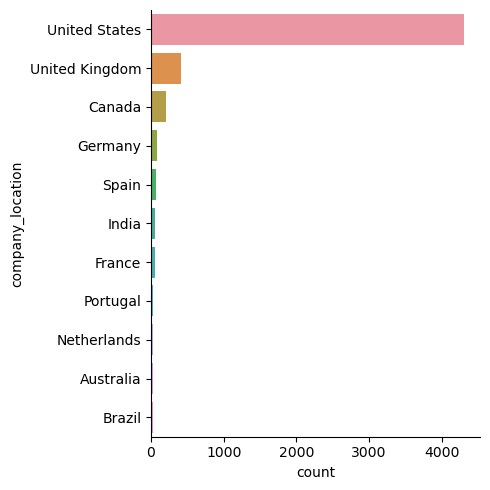

In [47]:
# Counting the entries of our dataset considering only company_location higher than 20 entries

location_counts = mini_project_dataset['company_location'].value_counts()
# Filter locations with more than 20 entries
locations_with_more_than_20_entries = location_counts[location_counts > 20].index
# Filter the dataset to include only locations with more than 20 entries
filtered_dataset = mini_project_dataset[mini_project_dataset['company_location'].isin(locations_with_more_than_20_entries)]

sns.catplot(y = "company_location", kind = "count",data = filtered_dataset, order=filtered_dataset["company_location"].value_counts().index)
plt.show()

In [48]:
company_location_United_States = len(mini_project_dataset[mini_project_dataset["company_location"]=="United States"])
print("Employees whose company location is in United States:",company_location_United_States)

Employees whose company location is in United States: 4311


In [49]:
# 4311 Employees whose company location is in United States / Total of 5561 employees of our dataset = 77.52%
4311/5561
# We note that the entries of our dataset is concentrated (77.52%) to the country_location United States

0.7752202841215609

<Axes: xlabel='salary_in_usd', ylabel='company_location'>

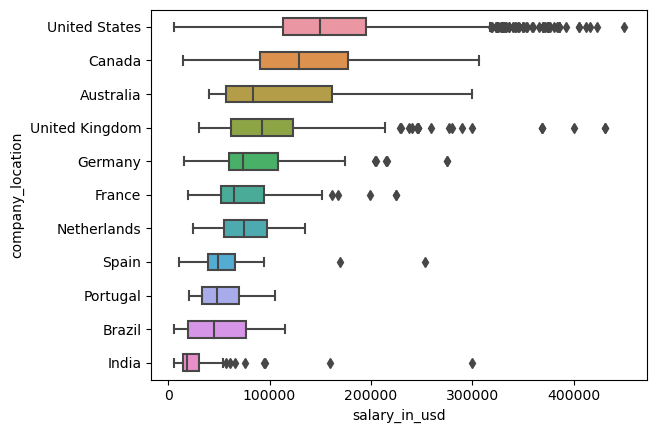

In [50]:
# Using seaborn.boxplot to shows the distribution of salary_in_usd compared to the 11 countries with most number of entries (country_locantion > 20 entries)
# boxplot allows to quickly get the median, quartiles and outliers

location_counts = mini_project_dataset['company_location'].value_counts()
# Filter locations with more than 20 entries
locations_with_more_than_10_entries = location_counts[location_counts > 20].index
# Filter the dataset to include only locations with more than 20 entries
filtered_dataset = mini_project_dataset[mini_project_dataset['company_location'].isin(locations_with_more_than_20_entries)]

sns.boxplot(data=filtered_dataset, x='salary_in_usd', y='company_location', width=.5, order=filtered_dataset.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False).index)

In [51]:
# Using using ploty to create Choropleth Map 

data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = top_10_avg_salaries['company_location'],
        locationmode = "country names",
        z = top_10_avg_salaries['salary_in_usd'],
        text = top_10_avg_salaries['company_location'],
        colorbar = {'title' : 'Salary (USD)'},
      )
    
layout=dict(title_text = 'Salary (USD) by company location')
fig = go.Figure(data=data,layout=layout) 
chart_studio.plotly.iplot(fig, filename='choropleth', sharing='public')

In [52]:
numerical_data = mini_project_dataset.select_dtypes(include=np.number)
numerical_data

,work_year,salary,salary_in_usd
0,2023,80000,85847
1,2023,30000,30000
2,2023,25500,25500
3,2023,175000,175000
4,2023,120000,120000
...,...,...,...
8586,2022,75000,75000
9068,2022,75000,75000
9123,2021,38400,38400
9276,2021,50000,50000


In [76]:
Q1= mini_project_dataset["salary_in_usd"].quantile(0.25)
Q3= mini_project_dataset["salary_in_usd"].quantile(0.75)
IQR = Q3 -Q1
mini_project_dataset_outliers_removed  = mini_project_dataset[(mini_project_dataset["salary_in_usd"] > Q1 - 1.5 * IQR) & (mini_project_dataset["salary_in_usd"] < Q3 + 1.5 * IQR)]
mini_project_dataset_outliers_removed

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,Remote,Spain,L
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,United States,Remote,United States,S
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,United States,Remote,United States,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,Canada,Remote,Canada,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,Canada,Remote,Canada,M
...,...,...,...,...,...,...,...,...,...,...,...
8586,2022,Mid-level,Full-time,Applied Machine Learning Scientist,75000,USD,75000,Bolivia,Remote,United States,M
9068,2022,Mid-level,Full-time,Applied Machine Learning Scientist,75000,USD,75000,Bolivia,Remote,United States,L
9123,2021,Mid-level,Full-time,Applied Machine Learning Scientist,38400,USD,38400,Vietnam,Remote,United States,M
9276,2021,Senior,Full-time,Data Analytics Engineer,50000,USD,50000,Vietnam,Remote,United Kingdom,M


In [77]:
mini_project_dataset_outliers_removed["employee_residence"] = mini_project_dataset_outliers_removed["employee_residence"].str.replace(" ", "-")
mini_project_dataset_outliers_removed

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,Remote,Spain,L
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,United-States,Remote,United States,S
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,United-States,Remote,United States,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,Canada,Remote,Canada,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,Canada,Remote,Canada,M
...,...,...,...,...,...,...,...,...,...,...,...
8586,2022,Mid-level,Full-time,Applied Machine Learning Scientist,75000,USD,75000,Bolivia,Remote,United States,M
9068,2022,Mid-level,Full-time,Applied Machine Learning Scientist,75000,USD,75000,Bolivia,Remote,United States,L
9123,2021,Mid-level,Full-time,Applied Machine Learning Scientist,38400,USD,38400,Vietnam,Remote,United States,M
9276,2021,Senior,Full-time,Data Analytics Engineer,50000,USD,50000,Vietnam,Remote,United Kingdom,M


In [78]:
fig = px.violin(mini_project_dataset_outliers_removed, x="work_setting", y="salary_in_usd")
fig.show()

In [79]:
mini_project_dataset_outliers_removed["company_location"] = mini_project_dataset_outliers_removed["company_location"].str.replace(" ", "-")
mini_project_dataset_outliers_removed

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,Remote,Spain,L
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,United-States,Remote,United-States,S
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,United-States,Remote,United-States,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,Canada,Remote,Canada,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,Canada,Remote,Canada,M
...,...,...,...,...,...,...,...,...,...,...,...
8586,2022,Mid-level,Full-time,Applied Machine Learning Scientist,75000,USD,75000,Bolivia,Remote,United-States,M
9068,2022,Mid-level,Full-time,Applied Machine Learning Scientist,75000,USD,75000,Bolivia,Remote,United-States,L
9123,2021,Mid-level,Full-time,Applied Machine Learning Scientist,38400,USD,38400,Vietnam,Remote,United-States,M
9276,2021,Senior,Full-time,Data Analytics Engineer,50000,USD,50000,Vietnam,Remote,United-Kingdom,M


In [80]:
mini_project_dataset_outliers_removed.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [81]:
features_list = ["experience_level", 'employment_type','work_setting','company_size', "job_title", "company_location", "employee_residence", 'work_year']

X = mini_project_dataset_outliers_removed.loc[:,features_list] 
y = mini_project_dataset_outliers_removed.loc[:,"salary_in_usd"] 


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42)


In [83]:


numeric_features = [7] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [0, 1, 2, 3, 4, 5, 6]
categorical_transformer = OneHotEncoder(handle_unknown = "infrequent_if_exist")


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)


In [84]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [85]:
y_train_pred = regressor.predict(X_train)

In [86]:
X_test = feature_encoder.transform(X_test)

In [87]:
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5])

...Done.
[166595.02872532 130972.24453095 122436.23365493 193997.05539247
 162155.70256452]


In [88]:
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

R2 score on training set :  0.47706655027653866
R2 score on test set :  0.45651395919020876


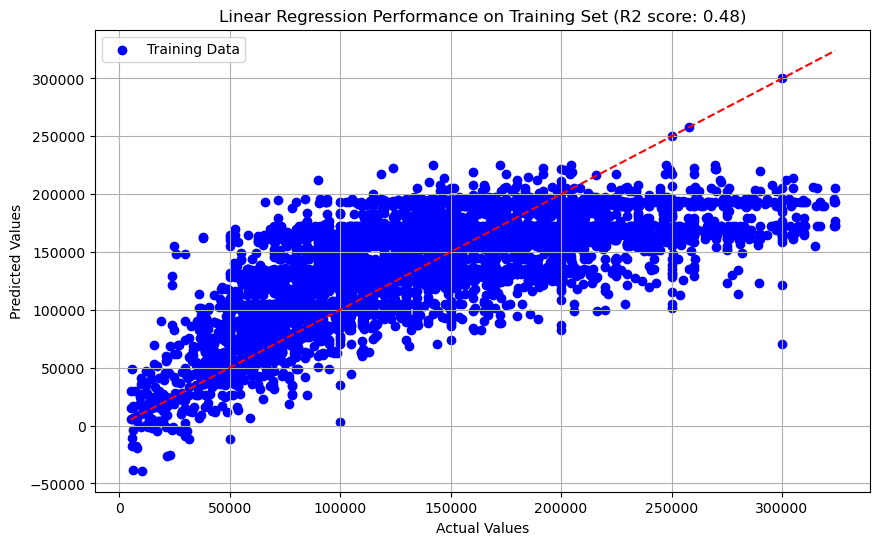

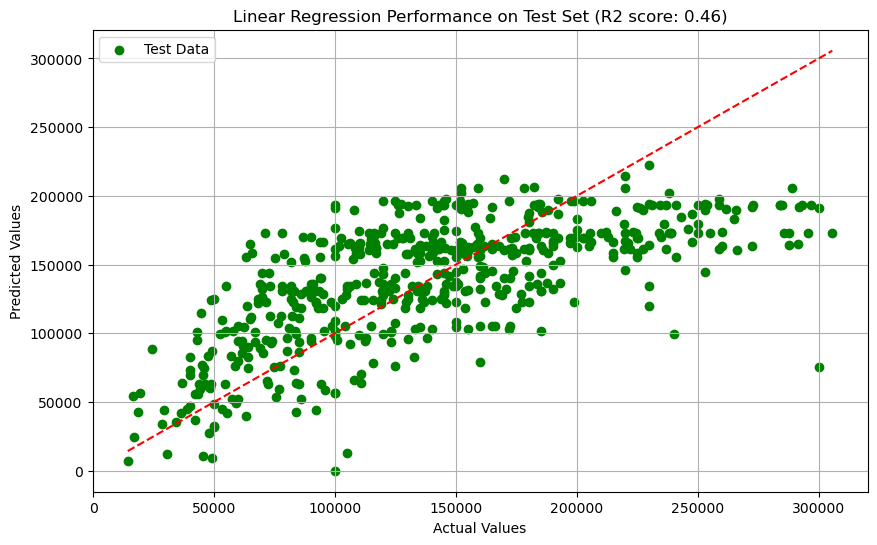

In [89]:
train_r2_score =  0.47706655027653866
test_r2_score = 0.45651395919020876


plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Performance on Training Set (R2 score: {:.2f})'.format(train_r2_score))
plt.grid(True)
plt.legend()
plt.show()

# Plot actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Performance on Test Set (R2 score: {:.2f})'.format(test_r2_score))
plt.grid(True)
plt.legend()
plt.show()

In [90]:
fig = px.violin(mini_project_dataset_outliers_removed, x="company_size", y="salary_in_usd")
fig.show()

In [91]:
fig = px.violin(mini_project_dataset_outliers_removed, x="work_setting", y="salary_in_usd")
fig.show()

In [93]:
location_counts = mini_project_dataset['company_location'].value_counts()
# Filter locations with more than 10 entries
locations_with_more_than_10_entries = location_counts[location_counts > 10].index
# Filter the dataset to include only locations with more than 10 entries
filtered_dataset = mini_project_dataset[mini_project_dataset['company_location'].isin(locations_with_more_than_10_entries)]
# Calculate average salaries for each company location
avg_salary_by_location = filtered_dataset.groupby('company_location')['salary_in_usd'].mean().reset_index()
# Sort the average salaries in descending order
avg_salary_by_location_sorted = avg_salary_by_location.sort_values(by='salary_in_usd', ascending=False)
# Select the top 10 locations with the highest average salaries
top_10_avg_salaries = avg_salary_by_location_sorted.head(20)
# Create histogram
fig = px.bar(top_10_avg_salaries, x='company_location', y='salary_in_usd', title='Top 20 Average Salaries by Location')
fig.show()

In [70]:
avg_salary_by_setting_and_size = mini_project_dataset_outliers_removed.groupby(['work_setting', 'company_size'])['salary_in_usd'].mean().reset_index()

work_setting_order = ['Hybrid', 'Remote', 'In-person']

# Plotting with Plotly Express
fig = px.bar(avg_salary_by_setting_and_size, 
             x='company_size', 
             y='salary_in_usd', 
             color='work_setting', 
             barmode='group',
             title='Average Salary by Work Setting and Company Size',
             labels={'salary_in_usd': 'Average Salary (USD)', 'company_size': 'Company Size'},
             height=500,
             category_orders={'work_setting': work_setting_order}
            )

fig.update_layout(legend_title='Work Setting')

fig.show()

In [71]:
avg_salary_by_level_and_size = mini_project_dataset_outliers_removed.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean().reset_index()

experience_level_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']
# Plotting with Plotly Express
fig = px.bar(avg_salary_by_level_and_size, 
             x='company_size', 
             y='salary_in_usd', 
             color='experience_level', 
             barmode='group',
             title='Average Salary by Experience Level and Company Size',
             labels={'salary_in_usd': 'Average Salary (USD)', 'company_size': 'Company Size'},
             height=500,
             category_orders={'experience_level': experience_level_order}
            )

fig.update_layout(legend_title='Experience Level')

fig.show()

In [94]:
avg_salary_by_level_and_year = mini_project_dataset_outliers_removed.groupby(['experience_level', 'work_year'])['salary_in_usd'].mean().reset_index()

experience_level_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']

# Plotting with Plotly Express
fig = px.bar(avg_salary_by_level_and_year, 
             x='work_year', 
             y='salary_in_usd', 
             color='experience_level', 
             barmode='group',
             title='Average Salary by Experience Level and Work Year',
             labels={'salary_in_usd': 'Average Salary (USD)', 'work_year': 'Work Year'},
             height=500,
             category_orders={'experience_level': experience_level_order}) 

fig.update_layout(legend_title='Experience Level')

fig.show()

In [95]:
# sorting one specific country (e.g. Germany) of your dataset for further analysis 
mini_project_dataset_Germany = mini_project_dataset[mini_project_dataset["company_location"] == "Germany"]

# Average Salary by Experience Level in the chosen country
avg_salary_by_experince_Germany = mini_project_dataset_Germany.groupby(["experience_level"])['salary_in_usd'].mean().reset_index()

# Plotting with Plotly Express
fig = px.bar(avg_salary_by_experince_Germany, 
             x='experience_level', 
             y='salary_in_usd', 
             color='experience_level',             
             title="Average Salary by Experience Level in Germany",
             labels={'salary_in_usd': 'Average Salary (USD)', 'experience_level': 'Experience Level'},
             height=500)

fig.update_layout(xaxis={'categoryorder': 'total ascending'},
                  legend_title='Experience Level')

fig.show()

<Axes: xlabel='salary_in_usd', ylabel='company_location'>

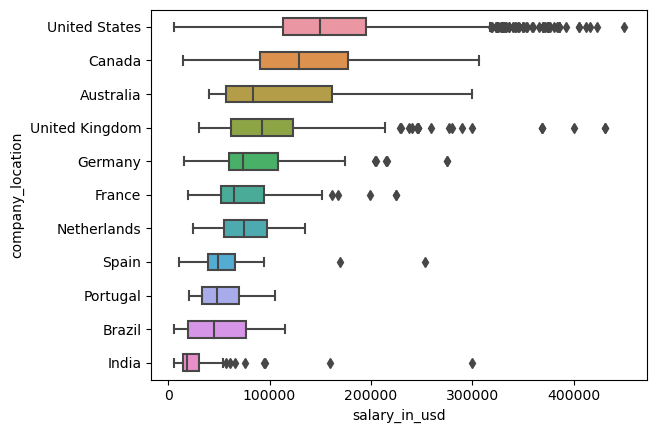

In [97]:
# Using seaborn.boxplot to shows the distribution of salary_in_usd compared to the 11 countries with most number of entries (country_locantion > 20 entries)
# boxplot allows to quickly get the median, quartiles and outliers

location_counts = mini_project_dataset['company_location'].value_counts()
# Filter locations with more than 20 entries
locations_with_more_than_10_entries = location_counts[location_counts > 20].index
# Filter the dataset to include only locations with more than 20 entries
filtered_dataset = mini_project_dataset[mini_project_dataset['company_location'].isin(locations_with_more_than_20_entries)]

sns.boxplot(data=filtered_dataset, x='salary_in_usd', y='company_location', width=.5, order=filtered_dataset.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False).index)

In [98]:
# Using using ploty to create Choropleth Map 

data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = top_10_avg_salaries['company_location'],
        locationmode = "country names",
        z = top_10_avg_salaries['salary_in_usd'],
        text = top_10_avg_salaries['company_location'],
        colorbar = {'title' : 'Salary (USD)'},
      )
    
layout=dict(title_text = 'AVG Salary (USD) by company location')
fig = go.Figure(data=data,layout=layout) 
chart_studio.plotly.iplot(fig, filename='choropleth', sharing='public')